Comparisons of locomotion predictions of different mechanistic latent variable models.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from disp import set_plot


STRAIN_KEY = '_'.join(['NM91', 'ZH23']).lower()
REG_KEY = 'ridge_alpha_10'

# Basic comparison of single vs population fits using different neural models.

In [2]:
TARG_BHV = 'MTN_RSDL'

NRL_MDLS = [
    'lin',  # linear neural model
    'lin2e',  # linear neural model (two-exp fit)
    'linr',  # linear neural model (fit w ridge regr)
    'ln',  # linear-nonlinear model
    'ln2e',  # linear-nonlinear model (two-exp fit)
    'lnr',  # linear-nonlinear model (fit w ridge regr)
    'ma',  # mult-adapt neural model
    'masoff',  # mult-adapt neural model with sine offset responses
]

In [3]:
# heuristic predictors
# time_rslt = np.load(f'data/simple/mlv/heuristic/time_{STRAIN_KEY}_{TARG_BHV.lower()}.npy', allow_pickle=True)[0]

# linear fits
# lin_rslt = np.load(f'data/simple/mlv/lin_filter/rc_lin_{STRAIN_KEY}_{TARG_BHV.lower()}_{REG_KEY}.npy', allow_pickle=True)[0]

# single-neuorn fits
# single_rslts = [
#     np.load(f'data/simple/mlv/neur_basic/baker_{nrl_mdl}_single_{STRAIN_KEY}_{TARG_BHV.lower()}.npy', allow_pickle=True)[0]
#     for nrl_mdl in NRL_MDLS
# ]

# ppln fits
ppln_rslts = [
    np.load(f'data/simple/mlv/neur_basic/baker_{nrl_mdl}_{STRAIN_KEY}_{TARG_BHV.lower()}_{REG_KEY}.npy', allow_pickle=True)[0]
    for nrl_mdl in NRL_MDLS
]

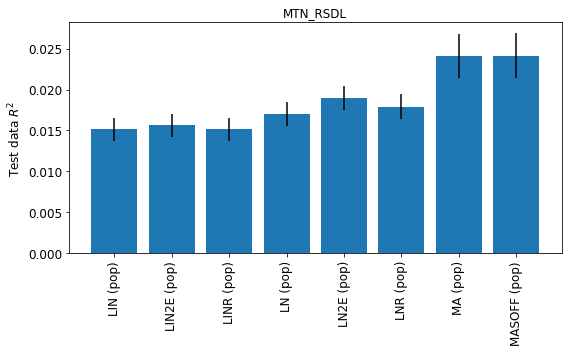

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5), tight_layout=True)
                
labels = []
r2_mns = []
r2_sems = []

targ = f'{TARG_BHV}_1_60'

# heuristics
# labels.append('Elapsed Time')
# r2_mns.append(time_rslt['r2_test'][targ].mean())
# r2_sems.append(time_rslt['r2_test'][targ].std() / np.sqrt(time_rslt['nsplit']))

# linear fits
# labels.append('Linear Filter')
# r2_mns.append(lin_rslt['r2_test'][targ].mean())
# r2_sems.append(lin_rslt['r2_test'][targ].std() / np.sqrt(lin_rslt['nsplit']))

# single neuron results
# for nrl_mdl, single_rslt in zip(NRL_MDLS, single_rslts):
#     r2_maxs = single_rslt['r2_test'][targ].max(axis=1)
#     labels.append(f'{nrl_mdl.upper()} (best)')
#     r2_mns.append(r2_maxs.mean())
#     r2_sems.append(r2_maxs.std() / np.sqrt(len(r2_maxs)))

# ppln results
for nrl_mdl, ppln_rslt in zip(NRL_MDLS, ppln_rslts):
    labels.append(f'{nrl_mdl.upper()} (pop)')
    r2_mns.append(ppln_rslt['r2_test'][targ].mean())
    r2_sems.append(ppln_rslt['r2_test'][targ].std() / np.sqrt(ppln_rslt['nsplit']))

ax.bar(np.arange(len(r2_mns)), r2_mns, yerr=r2_sems)
ax.set_xticks(np.arange(len(labels)))
ax.set_xticklabels(labels, rotation=90)
set_plot(ax, y_label=r'Test data $R^2$', title=f'{TARG_BHV}', font_size=12)